In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from itertools import combinations
from sklearn.model_selection import cross_val_score
%matplotlib inline

df = pd.read_csv("loan.csv", index_col = 0)
df["approved"] = df["Interest.Rate"] <= 12
df = df.dropna()

In [164]:
df.head(3)

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False


In [173]:
df[(df["Interest.Rate"] > 11.5) & (df["Interest.Rate"] <=12)]

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
277,11.54,670,36,3416.67,5000,True
288,11.71,685,36,3100.00,6000,True
319,11.71,680,36,4166.67,6400,True
481,11.99,680,36,3417.00,10000,True
482,11.71,685,36,3820.27,11000,True
644,11.71,675,36,3333.33,4500,True
1014,11.97,685,36,2500.00,5000,True
1051,11.97,680,36,15000.00,15600,True
1073,11.59,680,36,7083.33,4800,True
1436,11.71,685,36,4333.33,10000,True


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2500.0,13.066996,4.178230,5.42,10.16,13.11,15.8,24.89
FICO.Score,2500.0,705.888000,35.033161,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


In [98]:
df.head(3)

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,approved
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False


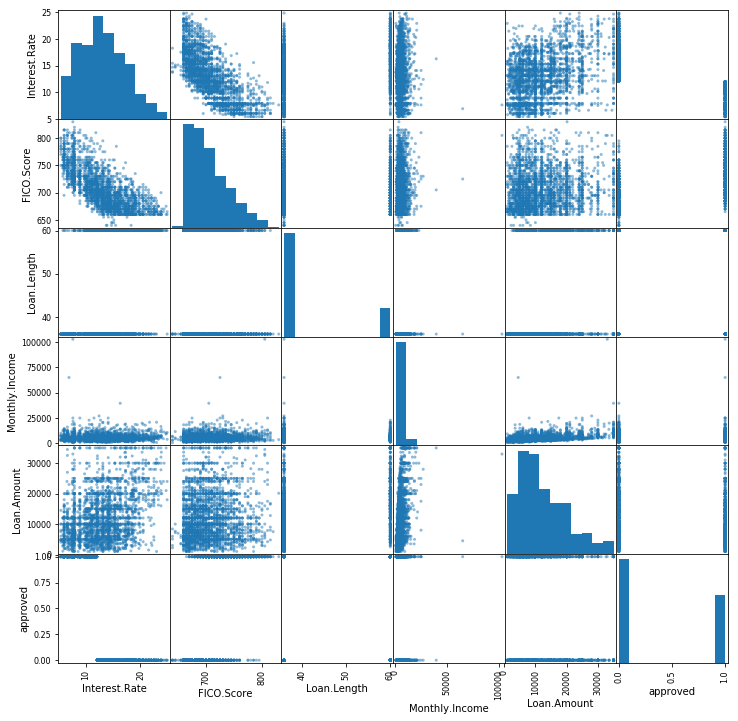

In [21]:
scatter_matrix(df, figsize = (12, 12))
None

In [108]:
dependent = "approved"
y = df[dependent]
X = df[["FICO.Score"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

j = 1

model = LogisticRegression(fit_intercept = j == 1).fit(X_train, y_train)
model.score(X_test, y_test) #Returns the number of trues divided by the number of falses and trues. ** Accuracy ***

0.7915151515151515

In [145]:
columns = [c for c in list(df) if c != dependent and c != "Interest.Rate"]
results = []
for i in range(1, len(columns) + 1):
    combos = list(combinations(columns, i))
    for c in combos:
        y = df[dependent]
        X = pd.DataFrame(df, columns = c) #Alternative assignment method
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
        for j in range(2):
            model = LogisticRegression(fit_intercept = False).fit(X_train, y_train)
            score = cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()
            results.append([score, "Intercept: {}".format(j == 1), c, "Coef: {}".format(model.coef_), "Int: {}".format(model.intercept_)])



In [154]:
max(results)

[0.8478961903390454,
 'Intercept: True',
 ('FICO.Score', 'Loan.Length'),
 'Coef: [[ 0.00532456 -0.10266092]]',
 'Int: 0.0']

In [149]:
y = df.approved
rows = []
for i in range(1,5):
    combos = list(combinations(['FICO.Score', 'Loan.Length', 'Monthly.Income', 'Loan.Amount'],i))
    for combo in combos:
        model = LogisticRegression(fit_intercept=True)
        accuracy = cross_val_score(model, df[list(combo)], df.approved, cv=10, scoring='accuracy').mean()
        rows.append({'Accuracy': accuracy, 'Columns': combo})
df1 = pd.DataFrame(rows)

In [152]:
df1.sort_values(by = "Accuracy", ascending = False)

,Accuracy,Columns
10,0.856703,"(FICO.Score, Loan.Length, Monthly.Income)"
4,0.837152,"(FICO.Score, Loan.Length)"
0,0.765154,"(FICO.Score,)"
11,0.729159,"(FICO.Score, Loan.Length, Loan.Amount)"
14,0.727960,"(FICO.Score, Loan.Length, Monthly.Income, Loan..."
6,0.622307,"(FICO.Score, Loan.Amount)"
12,0.620314,"(FICO.Score, Monthly.Income, Loan.Amount)"
13,0.613051,"(Loan.Length, Monthly.Income, Loan.Amount)"
9,0.612294,"(Monthly.Income, Loan.Amount)"
7,0.605836,"(Loan.Length, Monthly.Income)"


In [200]:
m1 = LogisticRegression().fit(df[["FICO.Score", "Loan.Length"]], df["approved"])
m1 = LogisticRegression().fit(df[["FICO.Score"]], df["approved"])

In [201]:
m1.coef_

array([[ 0.02417872]])

In [202]:
m1.predict([[725]])

array([ True], dtype=bool)

In [203]:
y_actual = df["approved"]
X = df[["FICO.Score"]]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [206]:
y_hat = m1.predict(X_test)

In [207]:
confusion_matrix(y_test, y_hat) # tn, fp, fn, tp


array([[473,  37],
       [121, 194]], dtype=int64)

In [208]:
m1.score(X_test, y_test)

0.80848484848484847

In [ ]:
  recall: 194 / (194 + 121) = .6158
precsion: 192 / (194 +  37) = .8398